# Data Preperation

In [85]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn import*
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler


# Load the datasets
train_data = pd.read_csv('datasets/Video_games_esrb_rating.csv')
test_data = pd.read_csv('datasets/test_esrb.csv')

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [87]:
train_data.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [88]:
# Separate features and target labels for training data
X_train = train_data.drop(columns=['esrb_rating', 'title'])
y_train = train_data['esrb_rating']
X_test = test_data.drop(columns=['esrb_rating', 'title'])
y_test = test_data['esrb_rating']

# Convert 'esrb_rating' to numeric labels for training
rating_to_number = {'E': 0, 'ET': 1, 'T': 2, 'M': 3}
y_train = y_train.map(rating_to_number)
y_test = y_test.map(rating_to_number)


In [89]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    weights_inputs_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, ))

In [90]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

y_train_enc = to_categorical(y_train_smote)
y_test_enc = to_categorical(y_test)

# TensorFlow neural network


Train on 1846 samples, validate on 910 samples
Epoch 1/100
1846/1846 [==============================] - 0s 270us/sample - loss: 1.0749 - acc: 0.5601 - val_loss: 0.5905 - val_acc: 0.8231
Epoch 2/100
1846/1846 [==============================] - 0s 54us/sample - loss: 0.4389 - acc: 0.8315 - val_loss: 0.2952 - val_acc: 0.8901
Epoch 3/100
1846/1846 [==============================] - 0s 49us/sample - loss: 0.3396 - acc: 0.8629 - val_loss: 0.2646 - val_acc: 0.9044
Epoch 4/100
1846/1846 [==============================] - 0s 43us/sample - loss: 0.3094 - acc: 0.8808 - val_loss: 0.2485 - val_acc: 0.9022
Epoch 5/100
1846/1846 [==============================] - 0s 47us/sample - loss: 0.2927 - acc: 0.8808 - val_loss: 0.1837 - val_acc: 0.9440
Epoch 6/100
1846/1846 [==============================] - 0s 45us/sample - loss: 0.2794 - acc: 0.8873 - val_loss: 0.2200 - val_acc: 0.9253
Epoch 7/100
1846/1846 [==============================] - 0s 54us/sample - loss: 0.2680 - acc: 0.8971 - val_loss: 0.2041 - va

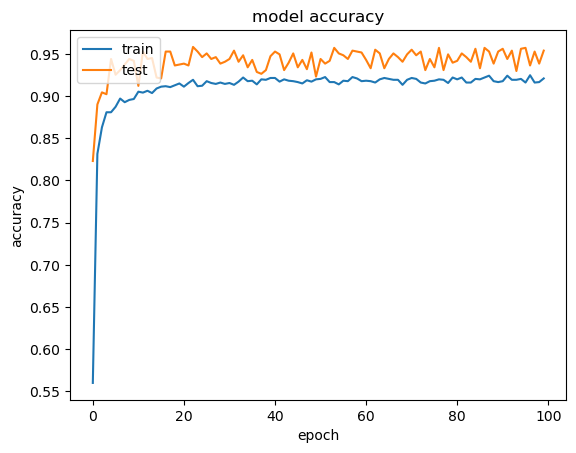

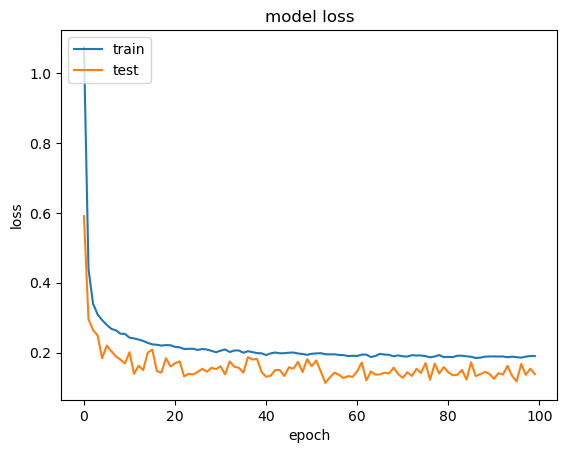

In [92]:
# Create the neural network model
model = Sequential()
model.add(Dense(50, input_dim=32, kernel_initializer='normal', activation='relu')) 
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='softmax'))

# Compile the model with appropriate loss function for multi-class classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
results = model.fit(X_train_smote, y_train_enc, validation_split=0.33, epochs=100, batch_size=32, verbose=1)

# Plotting the history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting the history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()